## Model Development

![image here](week4_image.png)

## Table of Contents
1. [Research Questions](#0)<br>
2. [Multi-Linear Regression](#1)<br>
3. [Model Evaluation](#2)<br>
4. [Polynomial Regression](#3)<br>
5. [Pipeline](#4)<br>
6. [Measure for In-Sample Evaluation](#5)<br>
7. [Polynomial Fit](#6) <br>


## 1) Research Question <a id="0"></a>

* Do I know if the dealer is offering fair value for my trade-in?

* Do I know if I put placed a fair value on my car?

In [107]:
#import linear_model from scikit-learn and other modules/libraries: 
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library. 'LinearRegression' is a class that helps with a supervised machine learning used for modeling the relationship between dependent and independent variables.
import seaborn as sns #seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.preprocessing import StandardScaler #StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.
from sklearn.preprocessing import PolynomialFeatures #PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
from sklearn.pipeline import Pipeline #Pipeline chains multiple estimators into one. All estimators except the last one must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).
from sklearn.metrics import mean_squared_error #mean_squared_error computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
import pandas as pd
import matplotlib.pyplot as plt #matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
import scipy #scipy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
import seaborn #seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import warnings #warnings are usually ignored by Python. Warnings are issued by Python when something unusual happens during execution of a program. Here, we are ignoring the warnings.
warnings.filterwarnings('ignore') #filterwarnings filters the warnings and ignores them.
import pandasai 
from pandasai import PandasAI 
import numpy as np
import statsmodels.api as sm

In [108]:
#Load data and store it in dataframe 'df':
df = pd.read_csv("auto.csv", header=0) #read_csv reads a comma-separated values (csv) file into DataFrame. header=0 means the first row is the header row.
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<b>How can "highway-mpg" help us predict car price?</b>

Let's create a linear function with "highway-mpg" as the predictor/explanatory variable and the "price" and the response/target variable.

In [109]:
#Create linear regression object:
lm=LinearRegression()

#Define predictor variable and target variable:
X=df[['highway-mpg']]
Y=df['price']

#Use the fit method to fit the model:
lm.fit(X,Y)

#Obtain the prediction (output should be an array):
yhat=lm.predict(X)


In [110]:
'''Within the y^=b0+b1x we want to find the parameters of b0 and b1 that minimize the error between actual y and predicted y.'''

#Create linear regression object:
lm=LinearRegression()
#Define predictor variable and target variable:
x=df[['highway-mpg']]
y=df['price']
#Use the fit method to fit the model:
lm.fit(x,y)

#Obtain the prediction (output should be an array):
Yhat=lm.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [111]:
#In y=mx+b, what is the value of b?
lm.intercept_

38423.3058581574

In [112]:
#What is the value of m?
lm.coef_


array([-821.73337832])

<b>preliminary conclusion</b>

A negative slope means a negative relationship between highway-mpg and price.

The final estimated linear model is:
y^=-821.73x+38423.31 OR Yhat=38423.31-821.73x
Where y^=Price and x=highway-mpg

<b>How can "engine-size" help us predict car price?</b>

In [113]:
#Create a linear regression object called "lm1":
lm1=LinearRegression()

#Set 'engine-size' as predictor variable and 'price' as target variable:
x=df[['engine-size']]
y=df['price']   

#Use the fit method to fit the linear model using the feature 'engine-size':
lm1.fit(x,y)

#Obtain the predictor:
Yhat1=lm1.predict(x)
Yhat1[0:5]


array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [114]:
#What is the value of the y-intercept (b0) OR b?
lm1.intercept_

-7963.338906281046

In [115]:
#WHat is the value of the slope (m)?
lm1.coef_

array([166.86001569])

What is the equation of the predicted line?
Yhat=-7963.34+166.86*x
Price=-7963.34+166.86*df['engine-size']

## 2) Multi-Linear Regression <a id="1"></a>

What if we want to predict the car price using more than one variable?

In this case we can use the Multiple Linear Regression. It is used to explain the relationship between one continuous response (depdent variable) and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. 

Good predictors of price:

* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg


In [116]:
#Develop a model using all the variables to predict price:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#Fit the linear model using the four above-mentioned variables:
lm.fit(Z, df['price'])


LinearRegression()

In [117]:
#What is the value of the y-intercept?
lm.intercept_

-15806.624626329194

In [118]:
#What are the values of the coefficients of the model?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [119]:
#Create the linear regression object:

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
lm = LinearRegression() #create a linear regression object
lm.fit(X, y) #fit the model using the feature 'horsepower'

LinearRegression()

In [120]:
#Define the list of the features:

b0 = lm.intercept_ #obtain the value of the intercept
b1 = lm.coef_[0] #obtain the value of the slope for horsepower
b2 = lm.coef_[1] #obtain the value of the slope for curb-weight
b3 = lm.coef_[2] #obtain the value of the slope for engine-size
b4 = lm.coef_[3] #obtain the value of the slope for highway-mpg

In [121]:
#Print the linear model:

#Price = b0 + b1 * horsepower + b2 * curb-weight + b3 * engine-size + b4 * highway-mpg
#Create a mathematical function using the b0 = lm.intercept_
#b1 = lm.coef_[0]
#b2 = lm.coef_[1]
#b3 = lm.coef_[2]
#b4 = lm.coef_[3]

print('f(x_1, x_2, x_3, x_4) = ', b1, ' * x_1 + ', b2, ' * x_2 + ', b3, ' * x_3 + ', b4, ' * x_4', b0)


f(x_1, x_2, x_3, x_4) =  53.495744226049275  * x_1 +  4.70770099461392  * x_2 +  81.53026382122768  * x_3 +  36.057488816485865  * x_4 -15806.624626329194


What is the linear function we get?

Price=-15806.62+53.50*horsepower+4.70*curb-weight+81.53*engine-size+36.06*highway-mpg

In [124]:
# Creating individual linear regression models for each feature and calculating their coefficients
linear_functions = {}
for feature in X.columns:
    # Fitting linear regression model for each feature
    lm_single = LinearRegression()
    lm_single.fit(df[[feature]], y)

    # Extracting coefficients and intercept for each model
    b0_single = lm_single.intercept_
    b1_single = lm_single.coef_[0]

    # Storing the linear function
    linear_functions[feature] = (b1_single, b0_single)

In [13]:
'''Create a train of multiple linear regression model "lm2" where the response 
varaible is price, and the predictor varaible is 'normalized-losses'
and 'highway-mpg'.'''
lm2=LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price']) #fit the model using the two variables

LinearRegression()

In [14]:
#Find the coefficient of the model:
lm2.coef_

array([   1.49789586, -820.45434016])

## 3) Model Evaluation <a id="2"></a>

How do we evaluate our models and choose the best one? One way is through visualization.

An excellent way to visualize the fit of our model is by using regression plots. 
The plot will show the scattered data points and the linear regression line through the data. The regression line will:
* Give us a reasonable estimate of the relationship between the two varaibles,
* the stregth of the correlation, 
* and the direction (positive or negative) of the correlation.


In [122]:
#Creating individual linear regression models for each independent variabe:

linear_functions={} #create an empty dictionary for storing the linear functions
for feature in X.columns:
    #Fitting linear regression model for each feature:
    lm_single=LinearRegression() #create a linear regression object
    lm_single.fit(df[[feature]],y) #fit the model using the 'feature' in our loop and y='price'

    #Extracting coefficients and intercepts for each model:
    b0_single=lm_single.intercept_
    b1_single=lm_single.coef_[0] #lm_single.coef_ is an array with one element. Hence, we are extracting the first element of the array.

    #Storing the linear function
    linear_functions[feature]=(b0_single,b1_single)

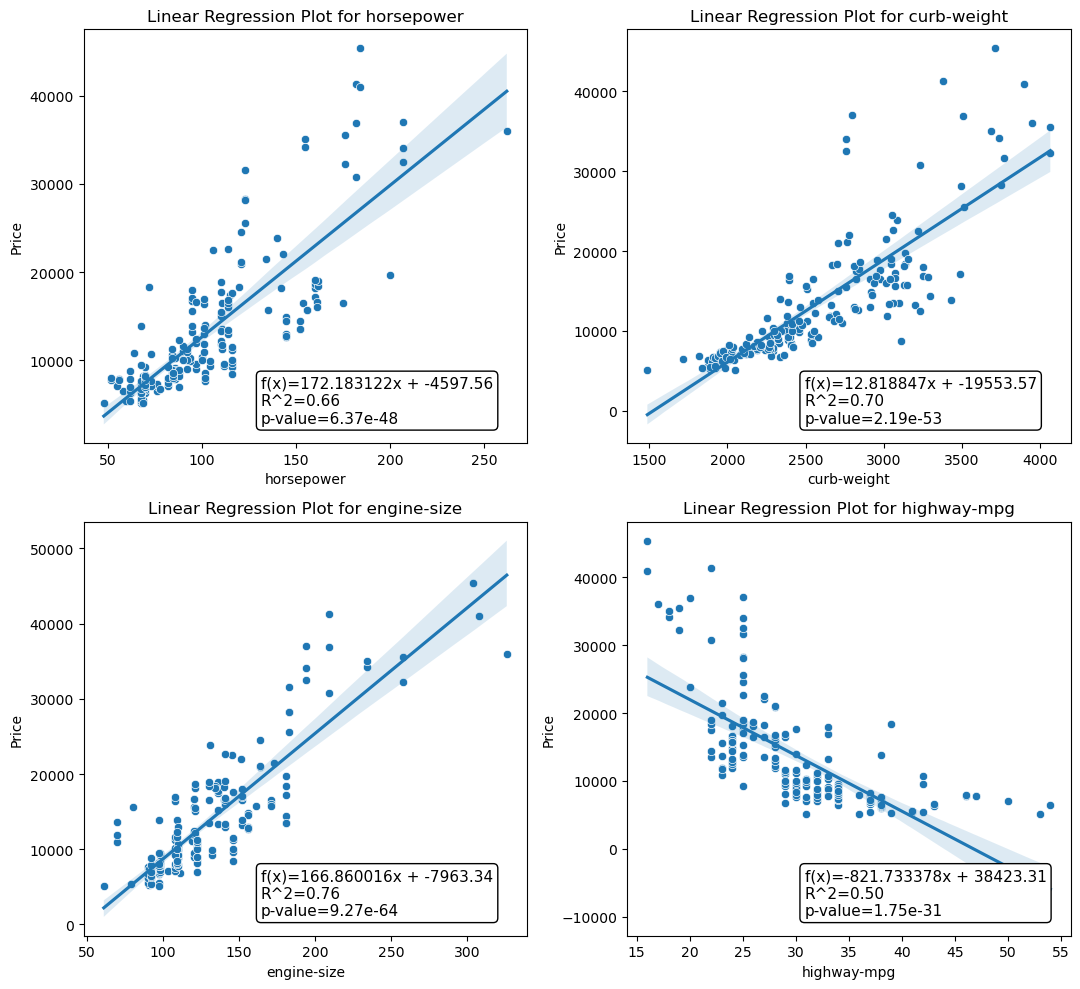

In [123]:
#Developing four linear regresssionf for the four independent variables: horsepower, curb-weight, engine-size, and highway-mpg:
#Add linear regression statical assesments

#Creating a scatter plot with linear regression lines for each independent variable:
plt.figure(figsize=(11,10))

#Plot for each independent variable:
for i, feature in enumerate(X.columns): #enumerate() method adds counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
    #Create a subplot for each feature:
    plt.subplot(2,2,i+1) #subplot() method returns a tuple containing a figure and axes object(s). Thus, a figure of 2 rows and 2 columns is created along with 4 axes objects. The axes object at index 1 is set as current axes.

    #Scatter plot of the feature vs. price
    sns.scatterplot(x=df[feature], y=y)

    #Adding a linear regression line to the scatter plot:
    sns.regplot(x=df[feature], y=y, scatter=False) #scatter=False means no scatter plot is shown in the graph. Which means only the linear regression line is shown.

    #Fitting the model using statsmodels for R^2 and P-value:
    '''Creates  a full linear regression model taht includes both intercept 
    and slope. More accurate in representing the relationship between the
    independent and dependent variables. 
    '''
    x_with_constant=sm.add_constant(df[feature]) #add_constant() adds a column of ones to an array. This is required for statsmodels to fit the intercept of the model.
    model=sm.OLS(y,x_with_constant).fit() #OLS() fits a linear model using Ordinary Least Squares. fit() fits the model and returns a RegressionResults object. fit() finds the values of m and b that minize the sum of squared difference between teh actual y and predicted y.

    #Getting R^2 and p-value for each feature:
    r_squared=model.rsquared
    p_value=model.pvalues[1] #model.pvalues is an array with two elements. The first element is the p-value for the intercept and the second element is the p-value for the slope. Hence, we are extracting the second element of the array.


    #Annotating the linear function mathematical model:
    b0, b1 = linear_functions[feature]
    linear_eq=f"f(x)={b1:2f}x + {b0:.2f}"
    linear_eq=f"{linear_eq}\nR^2={r_squared:.2f}\np-value={p_value:.2e}"
    plt.annotate(linear_eq, 
                 xy=(0.4, 0.05),  #xy sets the position of the text. (0.7, 0.1) means the text is placed at 70% of the x-axis and 10% of the y-axis.
                 xycoords='axes fraction', #xycoords sets the coordinate system to axes fraction. This means the x and y values are normalized between 0 and 1, where 0,0 is the lower left of the axes and 1,1 is the upper right of the axes.
                 fontsize=11,
                 bbox=dict(boxstyle="round,pad=0.3", #bodystyle sets the shape of the box containing the text. 
                            edgecolor='black', #edgecolor sets the color of the box edge.
                            facecolor='white')) #facecolor sets the color of the box face.


    #Setting the title and the labels
    plt.title(f'Linear Regression Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

    #Adding a legend:
    #plt.legend()

plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()




__Horsepower__

The regression analysis indicates a significant linear relationship between horsepower and car price. The regression model...

*f(x)=172.18x-4597.56*

indicates that for each unit increase in horsepower the price increases approximately to $172.18 after accounting for a base price of -$4,597.56. 

The coefficient of determination of R^2=0.66 implies that about 66% of the variability in the car price can be explained by horsepower. 

The extremely low p-value of 6.37x10^-48 strongly rejects the null hypothesis, indicateing that the relationship between horsepower and price is statistically significant and unlikely due to random change. 

__Curb-weight__

The regression model of...

*f(x)=12.82x-19,553.57* 

indicates that for each unit increase in curb-weight unit, the car price increases by $12.82, considering a base price of -$19,553.57.

R^2=0.70 suggests that 70% of the varaibility in car price can be explained by curb-weight. 

A P-value of 2.19x10^-53 strong indicates that the relationship betweet curb-weight and price is statsitically significant.

__Highway-MPG__

The highway-MPG regression model...

*f(x)=-821.73x+38,423.31*

suggest a negative correlation between highway-MPG in which price decrease by -$821.73 by the each unit increase in highway-MPG. 

R^2=0.76 means that 76% of the price variability can be explained by the highway-MPG.

The extremely low P-value=9.27x10^-64 strongly rejects the null hypothesis, indicating that the relationship between highway-mpg and price is statistically significant. 


__Engine-size__

The linear regression model of....

__f(x)=-821.73X+38,423.31__

indicates a negative linear relationship in which the price of the used vehicle decreased by $821.73 per each unit by which the engine size increases. 

The R^2=0.50 means that 50% of the price variability can be explained by engine size. 

P-value=1.75x10^-10 strongly suggests that engine size is a significant predictor of car price, rejecting the null hypothesis. 











<b>How can 'peak-rpm' help us predict car price?</b>

Now, let's examine the relationship between price and 'peak-rpm'. What do you think the relationship will be? Since 'peak-rpm' can be equated to higher horsepower, I think there is going to be a positive correlation between price (dependent/response variable) and 'peak-rpm' (independent/explanatory variable)


(0.0, 47414.1)

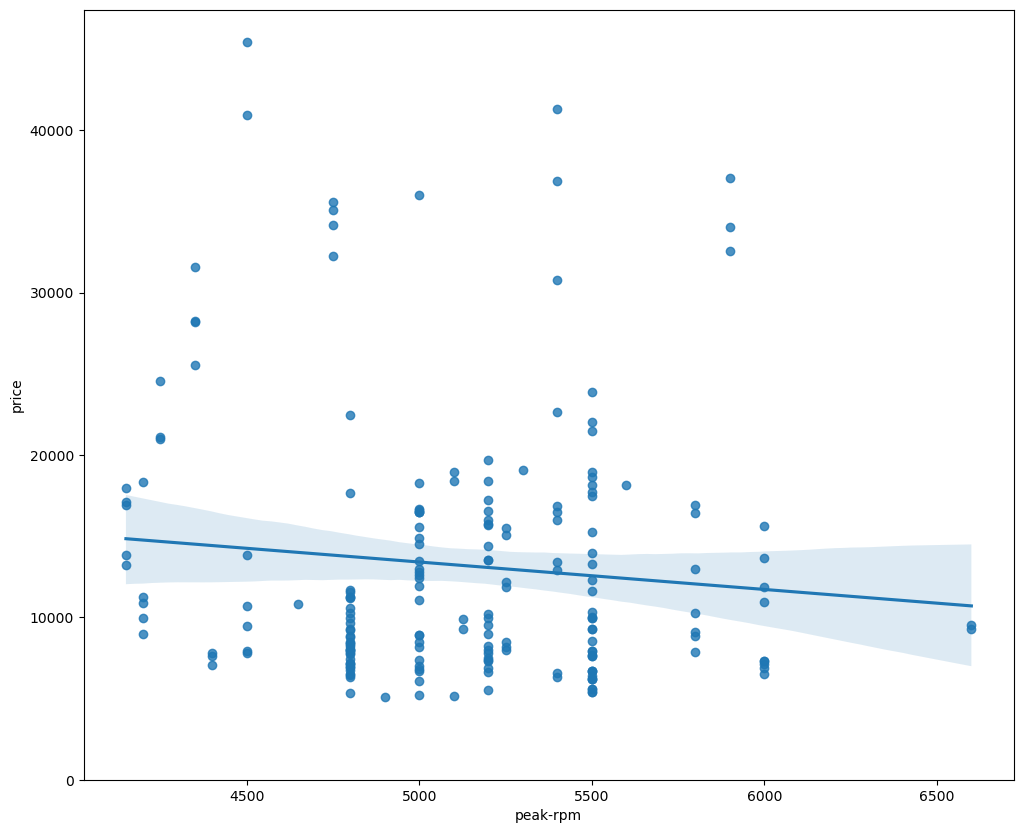

In [17]:
#Create a regression plot of 'peak-rpm' and 'price':
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

There is not so much a correlation between 'peak-rpm' and 'price'. This is because the actual values are more spread out away from the regression line. Aside from  that, the line is almost horizontal, tilting slighly towards a negative correlation. 

<b>Is 'peak-rpm' or 'highway-mpg' more strongly correlated with 'price'?</b>

In [18]:
#Is 'peak-rpm' or 'highway-mpg' more strongly correlated with 'price'? Use the method ".corr()" to verify your answer.
df[['peak-rpm','highway-mpg','price']].corr() #corr computes pairwise correlation coefficient of columns, excluding NA/null values.


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Since the correlation coefficient between 'peak-rpm' and 'price' is 
lower (r=-0.101616) than the correlation coefficient between 'highway-mpg' and 
'price' (r=-0.704692), 'highway-mpg' has a stronger correlation with 'price'.

#### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

<b>residual</b>(e) is the difference between the observed (y) and the predicted value (y^). Its the distance between the data points and the regression line. 

The residual plot is a graph that shows the residuals on the vertical y-axis and the indepedent varaible on the horizontal x-axis. When we look at a residual plot, we look at the spread of the residuals. 

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. This is because randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. 

<Axes: xlabel='highway-mpg', ylabel='price'>

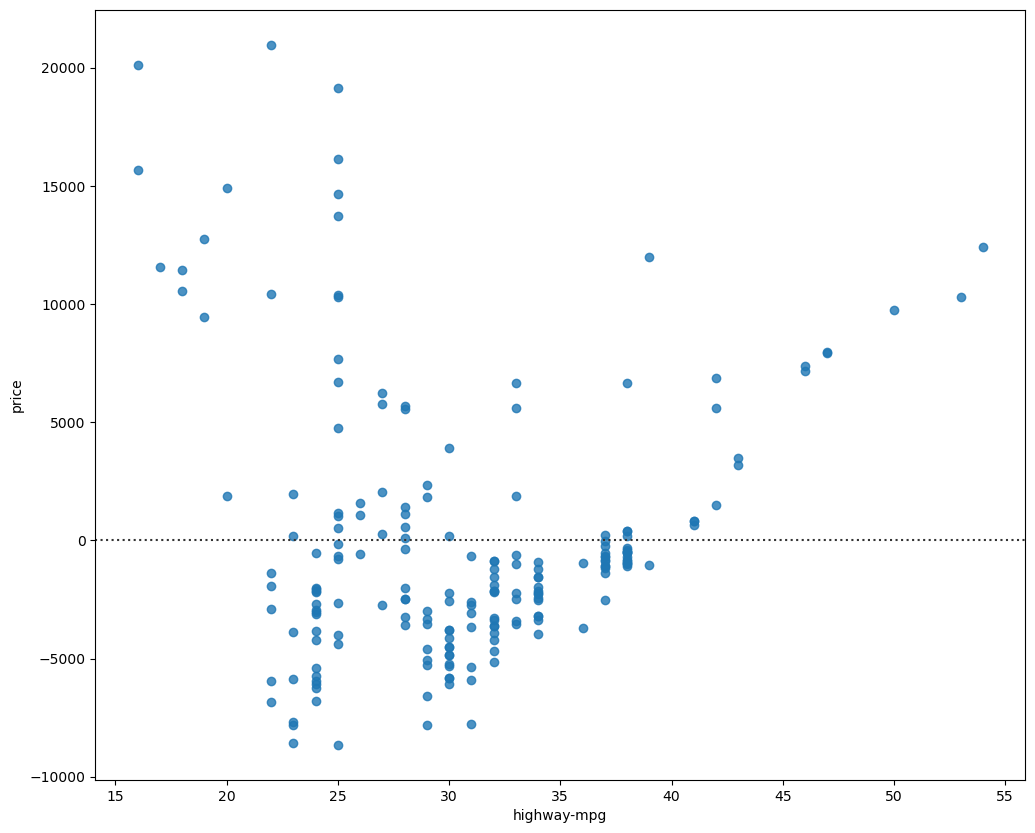

In [19]:
#Let's find the redidual plot for 'highway-mpg' and 'price':
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])

The residual plot above tells us that the residuals are not randomly spread around the x-axis, leading us to belive that maybe a non-linear model is more appropriate for this data. 

<b> How do we visualize a model for Multiple Linear Regression? </b>

One way is through the distribution plot, in which we look  at the distribution of the fitted/predicted values that result from the model and compare it to the distribution of the actual values. We compare by observing their distribution overlap

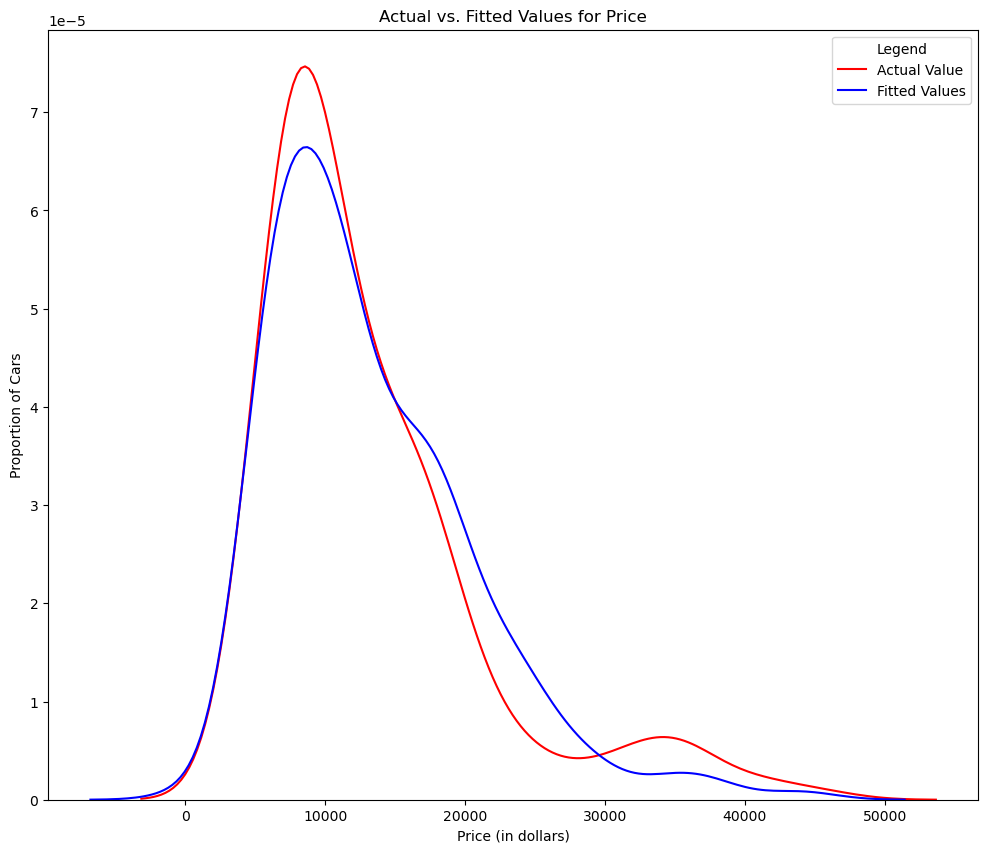

In [125]:
#Let's make a prediction:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Yhat=lm.predict(Z) #predict() predicts using the linear model with estimated coefficients.

plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'], hist=False, color='r', label='Actual Value') #sns.distplit() is the function part of the seaborn library used to plot the graph of the distribution of the data. df['price'] specifies the column as the variable to be plotted. hist=False means no histogram will be plotted. color='r' means the color of the plot will be red. label='Actual Value' means the label of the plot will be 'Actual Value'.
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1) #ax=ax1 means the plot will be plotted on the same axis as the previous plot.
plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

#Add legend to the plot:
plt.legend(title='Legend')

plt.show()
plt.close()

#Red is the actual value and blue is the fitted value. The two graphs overlap each other.

As you can see, we can see that the actual values and the fitted/predicted values are reasonably close since they overlap in their distribution. 

## 4) Polynomial Regression <a id="3"></a>
 <b>polynomial regression</b> is a particular case of general linear regression model or multiple linear regression models. We get non-linear relationships by higher order terms (e.g. quadratic, cubic) of the predictor variables. 


 Can a polynomial model be a better fit for the regression analysis between highway-mpg and price?

In [126]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100) #Generates 100 equally separated values from 15 to 55 since this is the range of the variable 'highway-mpg'.
    y_new=model(x_new) #calculates the y-values for the new data points by evaluating the provided 'model' (which is a polynomial function) at the 'x_new' data points.

    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-') #Creates a plot with two sets of data points: the first are independent and dependent variables as the first, and the second are the fitted polynomial curve (x_new,y_new) (plotted as a continuous line).
    plt.title('Polynomial Fit for Price and Highway MPG')
    ax=plt.gca() #Gets the current axes instance.
    ax.set_facecolor((0.898,0.898,0.898)) #Sets the background color of the current axes.
    fig=plt.gcf() #Gets the current figure instance.
    plt.xlabel(Name) #Sets the label for the X-axis.
    plt.ylabel('Price of Cars') #Sets the label for the Y-axis.
    plt.show() #Displays the figure.
    plt.close() #Closes the figure window.


In [127]:
x=df['highway-mpg']
y=df['price']

In [128]:
#Here we use a polynomial of the 3rd order (cubic) to generate a polynomial fit:
f=np.polyfit(x,y,3) #Fits a 3rd order polynomial to the data 
p=np.poly1d(f) #Generates a polynomial function from the coefficients of the polynomial fit.
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Notice that the leading coefficient (-1.557) is negative, creating a cubic function that starts by descending. 

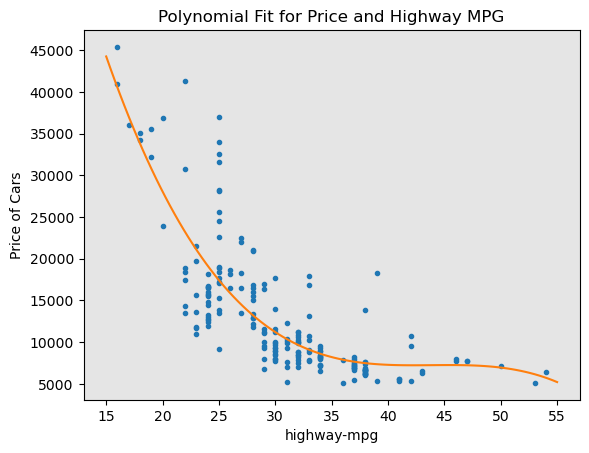

In [129]:
#Plotting the fucntion
PlotPolly(p,x,y,'highway-mpg')

In [25]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


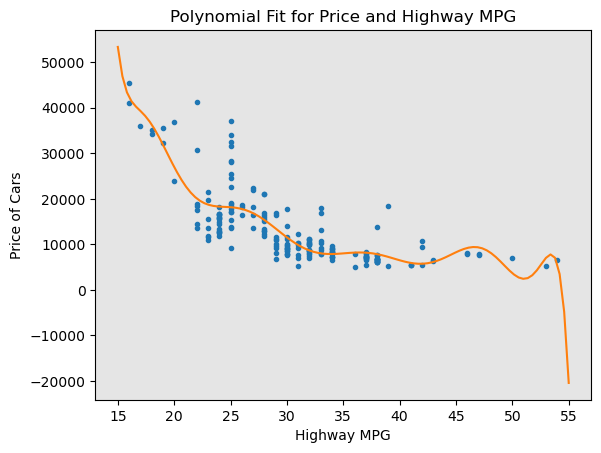

In [130]:
#Create 11 order polynomial model with the variable x and y from above:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')


#### Multivariate polynomial function

In [27]:
#Create a PolynomialFeature object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [28]:
Z_pr=pr.fit_transform(Z) #fit_transform() learns the parameters of the polynomial transformation based on the input data. It then transforms the data, returning a new data matrix.

#In the original data, there are 201 samples and 4 features:
Z.shape #'shape' is used to determine the dimension of the array.




(201, 4)

In [29]:
#After the transformation, there are 201 samples and 15 features:
Z_pr.shape

(201, 15)

## 5) Pipeline <a id="4"></a>
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline. 

A pipeline is a sequence of data processing steps that are applied in a specific order to transform the data and build a predictive model. It helps to streamline the process by combining multiple steps into a single object. 

In [30]:
from sklearn.pipeline import Pipeline #It allows for the creation of a pipeline object.
from sklearn.preprocessing import StandardScaler #Standardizes the features by subtracting the mean and scaling to unit variance.

In [31]:
'''We create a pipeline by creating a list of tuples including the name of the model 
or estimator and its corresponding constructor.'''

#Each tuple represents a step in the pipeline.  
Input=[('scale',StandardScaler()),#The first element of the tuple contains the name of the model/estimator.
       ('polynomial',PolynomialFeatures(include_bias=False)),#The second element of the tuple contains the model constructor.
       ('model',LinearRegres5sion())] #The last element of the tuple contains the model itself.

In [32]:
#Input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to the float to avoid covnersion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultanously.

Remember that normalization is the process through which we transform data to a common scale or range. The goal is to bring the data into standard format that allows for fair comparisons and analysis across different varaibles or datasets. 

In [33]:
Z=Z.astype(float) #Converts the data type of the array to float.
pipe.fit(Z,y) #Fits the model using the pipeline.

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously:
ypipe=pipe.predict(Z) #predict() is used to make predictions on new data using a trained model. It returns the predicted values.
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<b>Question #5:</b>
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y. 

In [35]:
Input=[('scale',StandardScaler()),('model',LinearRegression())] #We can simplify the above process by using the pipeline constructor 'Pipeline' to simplify the process of scaling, transforming and predicting.
pipe=Pipeline(Input) #Creates a pipeline object.
pipe.fit(Z,y) #Fits the model using the pipeline.

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

## 6) Measure for In-Sample Evaluation <a id="5"></a>

When evaluating our mdoules, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is. For this we have two very important measures that are often used in Statistics to determine the accuracy of a model:

* <b>R^2(coefficient of determination)</b>: measures to indicate how close the data is to the fitted regression line. 


* <b>Mean Squared Error (MSE)</b>: measures the average of the square of errors. That is, it measures the difference between the actual value (y) and the estiamted value (y^).



<b> Moduel 1: Simple Linear Regression: </b>
Let's calculate the R^2:

In [36]:
#highway_mpg_fit
lm.fit(X,Y)
#Find the R^2
print('The R-square is:',lm.score(X,Y))

The R-square is: 0.4965911884339176


This means that 49.659...% of the variation of the price is explained by this simple linear model 'highway_mpg'. 

Let's calculate the MSE:

In [37]:
#We can predict the output i.e. "yhat" using the predict method, where x is the input variable:
Yhat=lm.predict(X)
print('the output of the first four predicted value is:',Yhat[0:4])


the output of the first four predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [38]:
from sklearn.metrics import mean_squared_error #mean_squared_error computes the mean squared error regression loss.

In [39]:
#Compare the predicted results with the actual results:
mse=mean_squared_error(df['price'],Yhat)
print('The mean square error of price and predicted value is:',mse)

The mean square error of price and predicted value is: 31635042.944639888


#### Module 2: Multiple Linear Regression

Let's calculate the R^2

In [40]:
#Fit the model
lm.fit(Z,df['price'])
#Find the R^2
print('The R-square is:',lm.score(Z,df['price']))

The R-square is: 0.8093562806577457


We can say that 80.93...% of the variation of prices is explained by this multiple linear regression "multi_fit" of:
* horsepower
* curb-weight
* engine size
* highway-mpg

In [41]:
#Fitting a multiple linear model estimator

#Extract the four 4 predictor variables and store them in the variable Z:

Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#Train the multiple linear model using the four above-mentioned variables:
lm.fit(Z,df['price'])

#Obtain a prediction:
yhat=lm.predict(Z)

Let's calculate the MSE

In [42]:
#We produce a prediction:
Y_predict_multifit=lm.predict(Z) #'lm' is the linear regression object. 'predict()' is used to make predictions on new data using a trained model. It returns the predicted values.

#We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is:',mean_squared_error(df['price'],Y_predict_multifit))


The mean square error of price and predicted value using multifit is: 11980366.87072649


##  7) Polynomial Fit <a id="6"></a>

Let's calculate the R^2.


In [43]:
#Let's import the function r2_score from the module metrics as we are using a different function:
from sklearn.metrics import r2_score #r2_score computes the R^2 (coefficient of determination) regression score function.

In [44]:
#Apply the function to get the value of R^2:
r_squared=r2_score(y,p(x)) #y is the actual data. p(x) is the predicted data.
print('The R-square value is:',r_squared)



The R-square value is: 0.674194666390652


We can say that 67.419...% dfof the variation of price is explained by this polynomial fit. 

In [45]:
#Calculate the MSE:
mean_squared_error(df['price'],p(x))

20474146.426361214

#### Prediction and Decision Makign
We have used the method 'fit' but now we will be using the method 'predict' to produce a prediction for the dependent variable 'price' and the independent variable 'higway-mpg'.

In [46]:
#Importing pyplot for plotting:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#Create a new input: 
new_input=np.arange(1,100,1).reshape(-1,1) #Creates an array of numbers from 1-99. reshape(-1,1) reshapes the array to have 1 column and as many rows as necessary.
lm.fit(X,Y) #Fits the model using the linear regression object.
lm
yhat=lm.predict(new_input) #predict() is used to make predictions on new data using a trained model. It returns the predicted values.

In [48]:
#Produce prediction:
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

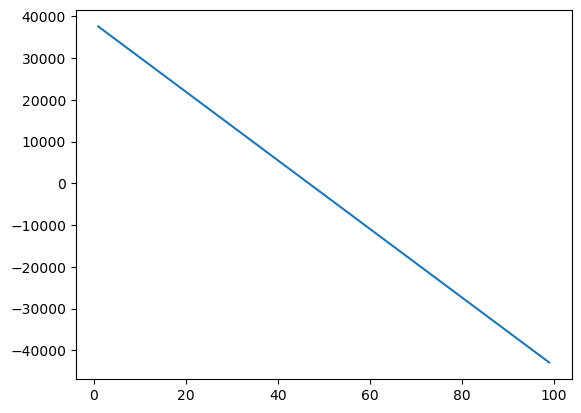

In [49]:
#Plot the data:
plt.plot(new_input,yhat) #Plots the predicted data.
plt.show() #Displays the figure.

#### Decision Making: Determining a Good Model Fit
We have visualized different models, generated the R-squared and MSE values for the fits. Now, how do we determine a good model fit?

* What is a good R-squared value? When comparing models, the model with the higher R-squared value is a better fit (closer to -1 ot 1).

* What is a good MSE? When comparing models, <mark>the model with the smalles MSE value is a better fit for the data</mark>. 

Comparison:

* Simple linear regression (SLR): using highway-mpg as a predictor for the target variable of price.
  1. R^2=0.4965....
  2. MSE=3.16X10^7 (31,635,042.94...)
* Multiple Linear Regression (MLR): Using Horsepower, Curb-weigth, Engine-siez, and Highway mpg as predictor variables of the taget varible of price.
  1. R-squared: 0.8089...
  2. MSE=1.2x10^7 (11,980,366.87...)
* Polynomial Fit: Using Highway-mpg as a predictor varaible for the target variable of price.
  1. R-squarred: 0.6742...
  2. MSE: 2.05x10^7 (20,474,146.42...)



#### Simple Linear Regression (SLR) vs. Multiple Linear Regression (MLR) Model
Usually, the more varaibles you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2. 

In order to compare the results of the single linear regression (SLR) model vs. the multiple linear regression (MLR) model, we look at the combination of both the R-squared and MSE to make the best conclusion about the fit of the model. 

* MSE: The MSE of SRL is 3.16X10^7 while MLR has an MSE of 1.2x10^7. So SLR>MSE. This means that MLR's MSE is a better fit. 
* R^2: SLR's R^2=0.4965..., and MLR's R^2=0.8189... SLR<MLR. This means that MLR's R^2 is a better fit. 

<mark>In conclusion, the MSE and R^2 demonstrate that Multi-Linear Regression (MLR) seems like the better fit for predicting price of used cars and their characteritic(s).<mark> 

#### Simple Linear Regression (SRL) vs. Polynomial Fit Model

* MSE: SRL's MSE=3.16X10^7 and Polynomial Fit's MSE's MSE=2.05x10^7, which means that SRL>Polynomial Fit. This means that the Polynomial Fit MSE's is a better fit model. 

* R^2: SLR's R^2=0.4965... and Polynomial Fit's R^2=0.6742.... THis means that SRL<Polynomial Fit.  This means that the Polynomial Fit's R^2 is a better fit model. 

<mark>Since the Polynomial Fit resulted in a lower MSE and a higher R-squred, we can condlude that this was a better fit model than the Simple Linear Regression (SLR) for predicting 'price' with 'highway-mpg' as the predictor variable.</mark>


#### Multiple-Linear Regression (MLR) vs. Polynomial Fit

* MSE: MLR's MSE= 1.2x10^7 and Polynomia Fit's MSE=2.05x10^7. MLR<Polynomial Fit. Therefore, MLR's MSE is a better fit model for predicting price.
* R-squared: MLR's R^2=0.8089... and Polynomial Fit's R^2=0.6742...MLR>Polynomial Fit. THerefore, the MLR's R^2 is a better fit model for  predicting price



### Conclusion:
Comparing the three models we can conclude that the <mark>MLR model is the best model to be able to predict price from our dataset. This result makes since because we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</mark>